# Exploration of hepatitis dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

In [3]:
# Define column names for the dataset from the hepatitis.names file
columns = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']

data = pd.read_csv('data/hepatitis/hepatitis.data', sep=',', header=None, names=columns, quotechar='"')


In [4]:
data.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [5]:
# Check for missing values if they match to information on hepatitis.names
data.isnull().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

In [6]:
# Check for missing values marked with a question mark
data.apply(lambda x: (x == '?').sum())

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

We can approve, we have the same missing value count as in the dataset README

array([[<Axes: title={'center': 'Class'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'ANTIVIRALS'}>],
       [<Axes: title={'center': 'HISTOLOGY'}>, <Axes: >]], dtype=object)

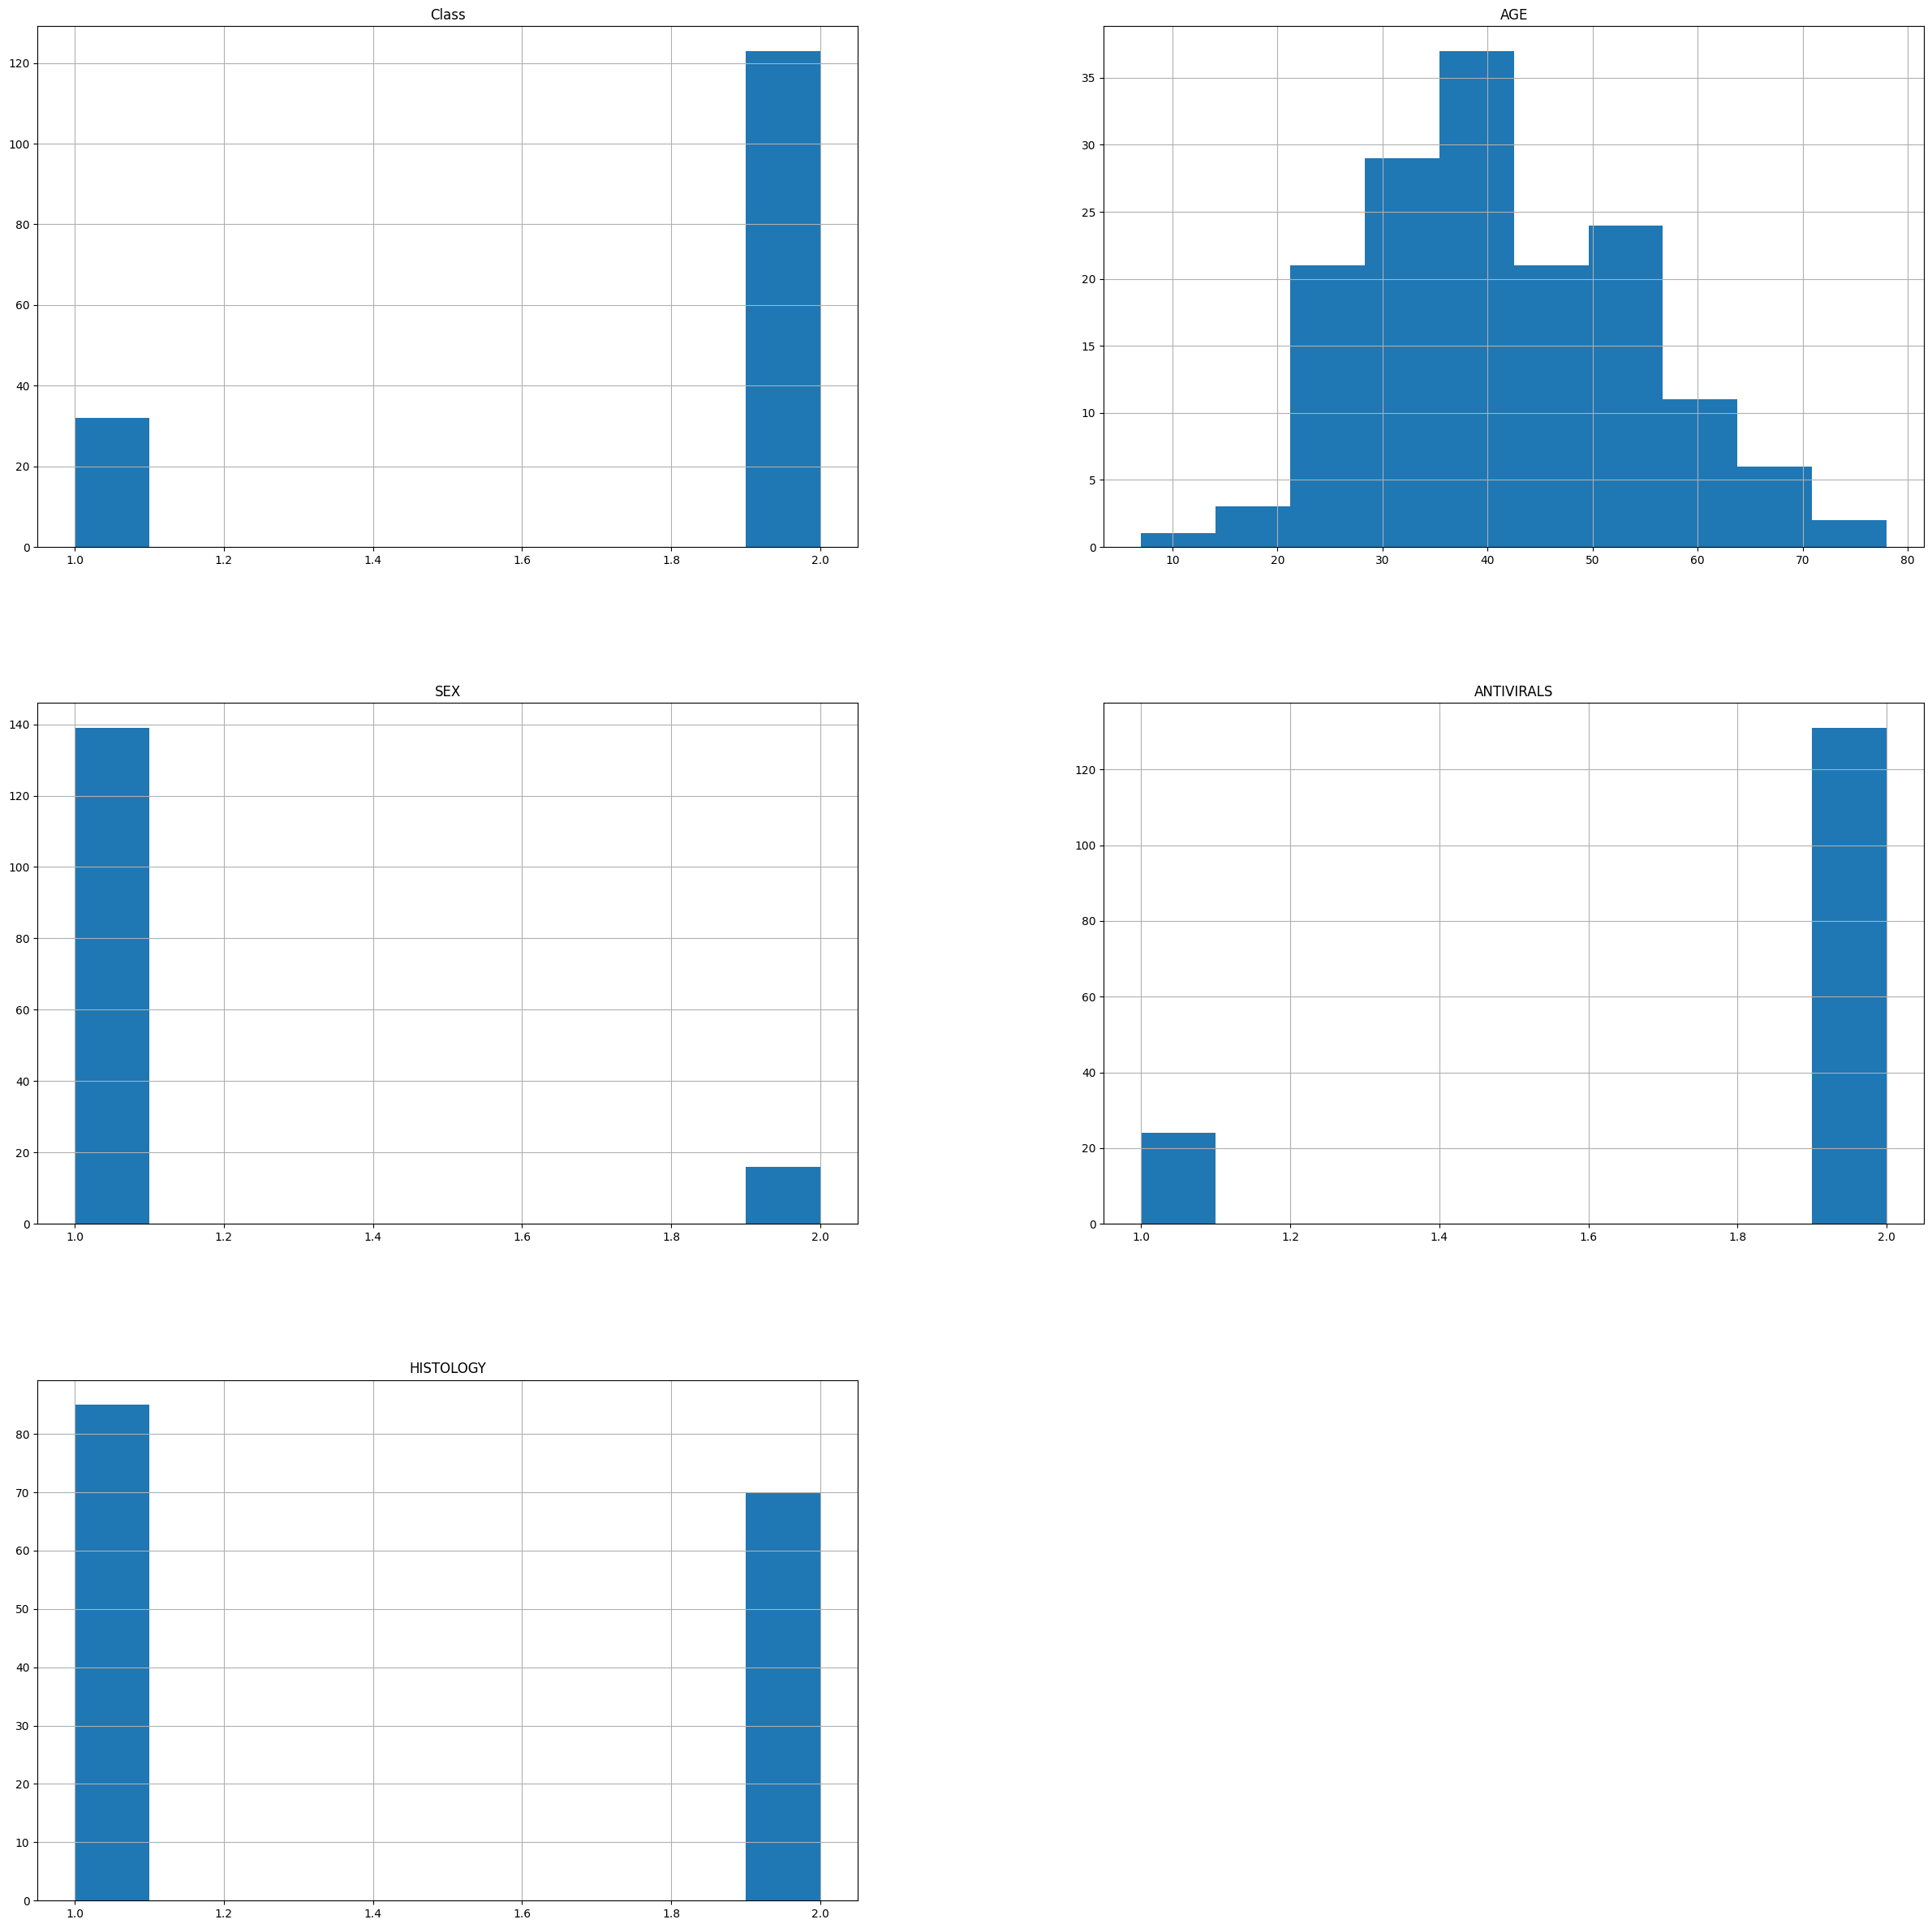

In [7]:
data.hist(figsize=(30,30))

This outputs only the five columns not containing any missing values.

In [8]:
data.shape

(155, 20)

In [9]:
data.describe()

,Class,AGE,SEX,ANTIVIRALS,HISTOLOGY
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.451613
std,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


In [10]:
data = data.replace('?', None)

In [11]:
data[data.isna().any(axis=1)]

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,None,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,None,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,None,1
3,2,31,1,None,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,None,200,4.0,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2,20,1,1,2,2,2,2,2,None,2,2,2,2,0.90,89,152,4.0,None,2
149,2,36,1,2,2,2,2,2,2,2,2,2,2,2,0.60,120,30,4.0,None,2
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,None,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,None,2


In [12]:
nan_list = data.isna().sum(axis=1).tolist()
[i for i in nan_list if i > 2]

[5, 4, 4, 5, 7, 4, 14, 7, 5, 4, 4, 3, 3, 3, 7, 4, 6]

There are multiple rows containing one or two missing values but ony a few having more than 2 missing values.

In [13]:
data.describe()

,Class,AGE,SEX,ANTIVIRALS,HISTOLOGY
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.451613
std,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


In [14]:
data.Target.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Target'

This is important to remember, that there is quite an imbalance in the target class.

In [ ]:
data.dtypes

Target              int64
AGE                 int64
SEX                 int64
STEROID            object
ANTIVIRALS          int64
FATIGUE            object
MALAISE            object
ANOREXIA           object
LIVER BIG          object
LIVER FIRM         object
SPLEEN PALPABLE    object
SPIDERS            object
ASCITES            object
VARICES            object
BILIRUBIN          object
ALK PHOSPHATE      object
SGOT               object
ALBUMIN            object
PROTIME            object
HISTOLOGY           int64
dtype: object

## Test imputer

In [ ]:
colnames_numerical = ["AGE", "BILIRUBIN", "ALK PHOSPHATE", "SGOT", "ALBUMIN", "PROTIME"]

In [ ]:
num_imputer = SimpleImputer(strategy='median')
num_imputer.fit(data[colnames_numerical])
num_data = pd.DataFrame(num_imputer.transform(data[colnames_numerical]), columns= colnames_numerical)
num_data.isnull().sum()

AGE              0
BILIRUBIN        0
ALK PHOSPHATE    0
SGOT             0
ALBUMIN          0
PROTIME          0
dtype: int64

In [ ]:
colnames_categorical = ['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 
            'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'HISTOLOGY']

cat_imputer = SimpleImputer(strategy='most_frequent', missing_values=None)
cat_imputer.fit(data[colnames_categorical])
cat_data = pd.DataFrame(cat_imputer.transform(data[colnames_categorical]), columns= colnames_categorical)
cat_data.isnull().sum()

SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
HISTOLOGY          0
dtype: int64

In [ ]:
# Here, we can compare how the None value in Steroid is computed differently
data[colnames_categorical].head()

,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY
0,2,1,2,2,2,2,1,2,2,2,2,2,1
1,1,1,2,1,2,2,1,2,2,2,2,2,1
2,1,2,2,1,2,2,2,2,2,2,2,2,1
3,1,None,1,2,2,2,2,2,2,2,2,2,1
4,1,2,2,2,2,2,2,2,2,2,2,2,1


In [ ]:
cat_data.head()

,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY
0,2,1,2,2,2,2,1,2,2,2,2,2,1
1,1,1,2,1,2,2,1,2,2,2,2,2,1
2,1,2,2,1,2,2,2,2,2,2,2,2,1
3,1,2,1,2,2,2,2,2,2,2,2,2,1
4,1,2,2,2,2,2,2,2,2,2,2,2,1


In [ ]:
# The other option for categorical values is to set an own categorical value such as 0 for int value with 1 and 2
colnames_categorical = ['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 
            'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'HISTOLOGY']

cat_imputer_fill = SimpleImputer(strategy='constant',missing_values=None, fill_value=0)
cat_imputer_fill.fit(data[colnames_categorical])
cat_data = pd.DataFrame(cat_imputer_fill.transform(data[colnames_categorical]), columns= colnames_categorical)
cat_data.isnull().sum()

SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
HISTOLOGY          0
dtype: int64

In [ ]:
cat_data.head()

,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY
0,2,1,2,2,2,2,1,2,2,2,2,2,1
1,1,1,2,1,2,2,1,2,2,2,2,2,1
2,1,2,2,1,2,2,2,2,2,2,2,2,1
3,1,0,1,2,2,2,2,2,2,2,2,2,1
4,1,2,2,2,2,2,2,2,2,2,2,2,1


# Heatmap for feature selection

<Axes: >

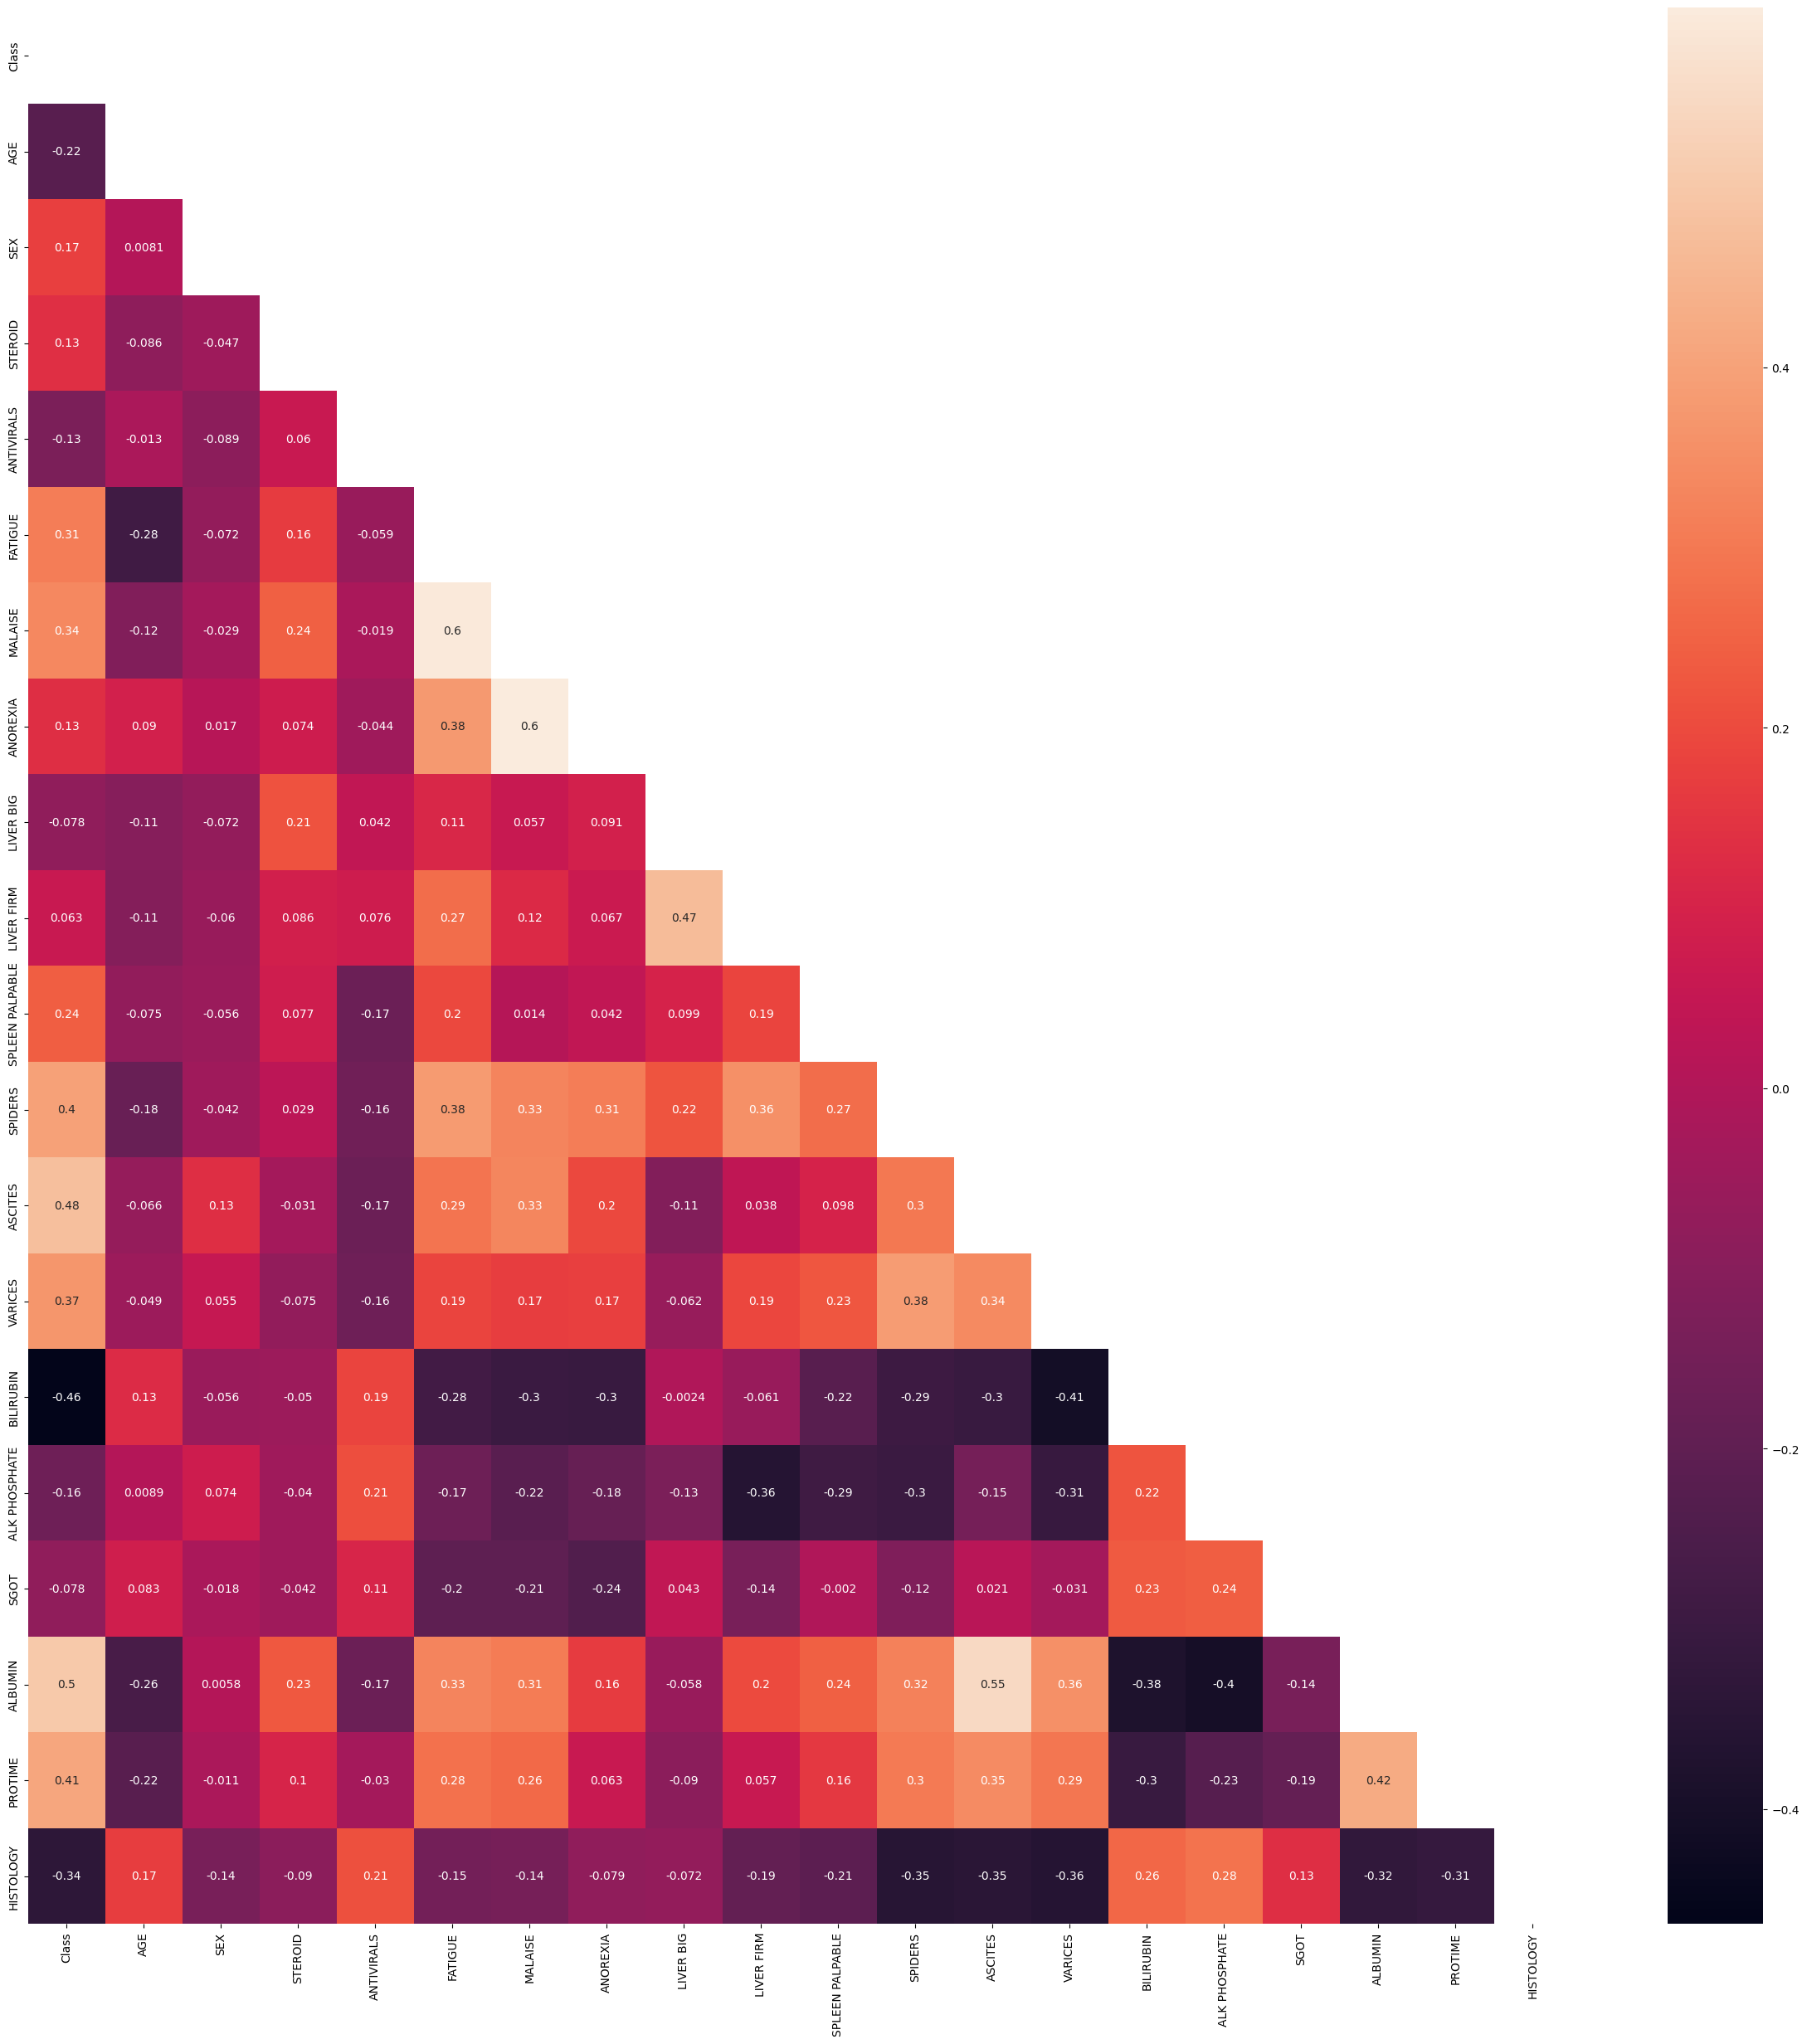

In [17]:
corr = data.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
plt.figure(figsize=(30, 30))
# using the upper triangle matrix as mask 
sns.heatmap(corr, mask=matrix, annot=True, xticklabels=True, yticklabels=True)

Our main interest are the high correlations of the target class. If we consider only correlations higher than 0.4 or lower than -0.4, we get the following classes for feature selection:
- SPIDERS
- ASCITES
- BILIRUBIN
- ALBUMIN
- PROTIME

In [18]:
data = data[['SPIDERS', 'ASCITES', 'BILIRUBIN', 'ALBUMIN', 'PROTIME']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SPIDERS    150 non-null    object
 1   ASCITES    150 non-null    object
 2   BILIRUBIN  149 non-null    object
 3   ALBUMIN    139 non-null    object
 4   PROTIME    88 non-null     object
dtypes: object(5)
memory usage: 6.2+ KB
